DeZero computational graph -> DOT language

In [8]:
import sys
import os

cwd = os.getcwd()

parent_dir = os.path.abspath(os.path.join(cwd, os.pardir))
sys.path.append(parent_dir)


import numpy as np
from dezero import Variable
from dezero.utils import get_dot_graph

x0 = Variable(np.array(1.0))
x1 = Variable(np.array(1.0))
y = x0 + x1

x0.name = 'x0'
x1.name = 'x1'
y.name = 'y'

txt = get_dot_graph(y, verbose=False)
print(txt)

with open('sample.dot', 'w') as o:
    o.write(txt)

digraph g {
5543081888 [label="y", color=orange, style=filled]
5543076656 [label="Add", color=lightblue, style=filled, shape=box]
5543078864 -> 5543076656
5543070176 -> 5543076656
5543076656 -> 5543081888
5543078864 [label="x0", color=orange, style=filled]
5543070176 [label="x1", color=orange, style=filled]
}


In [10]:
!dot sample.dot -T png -o sample.png

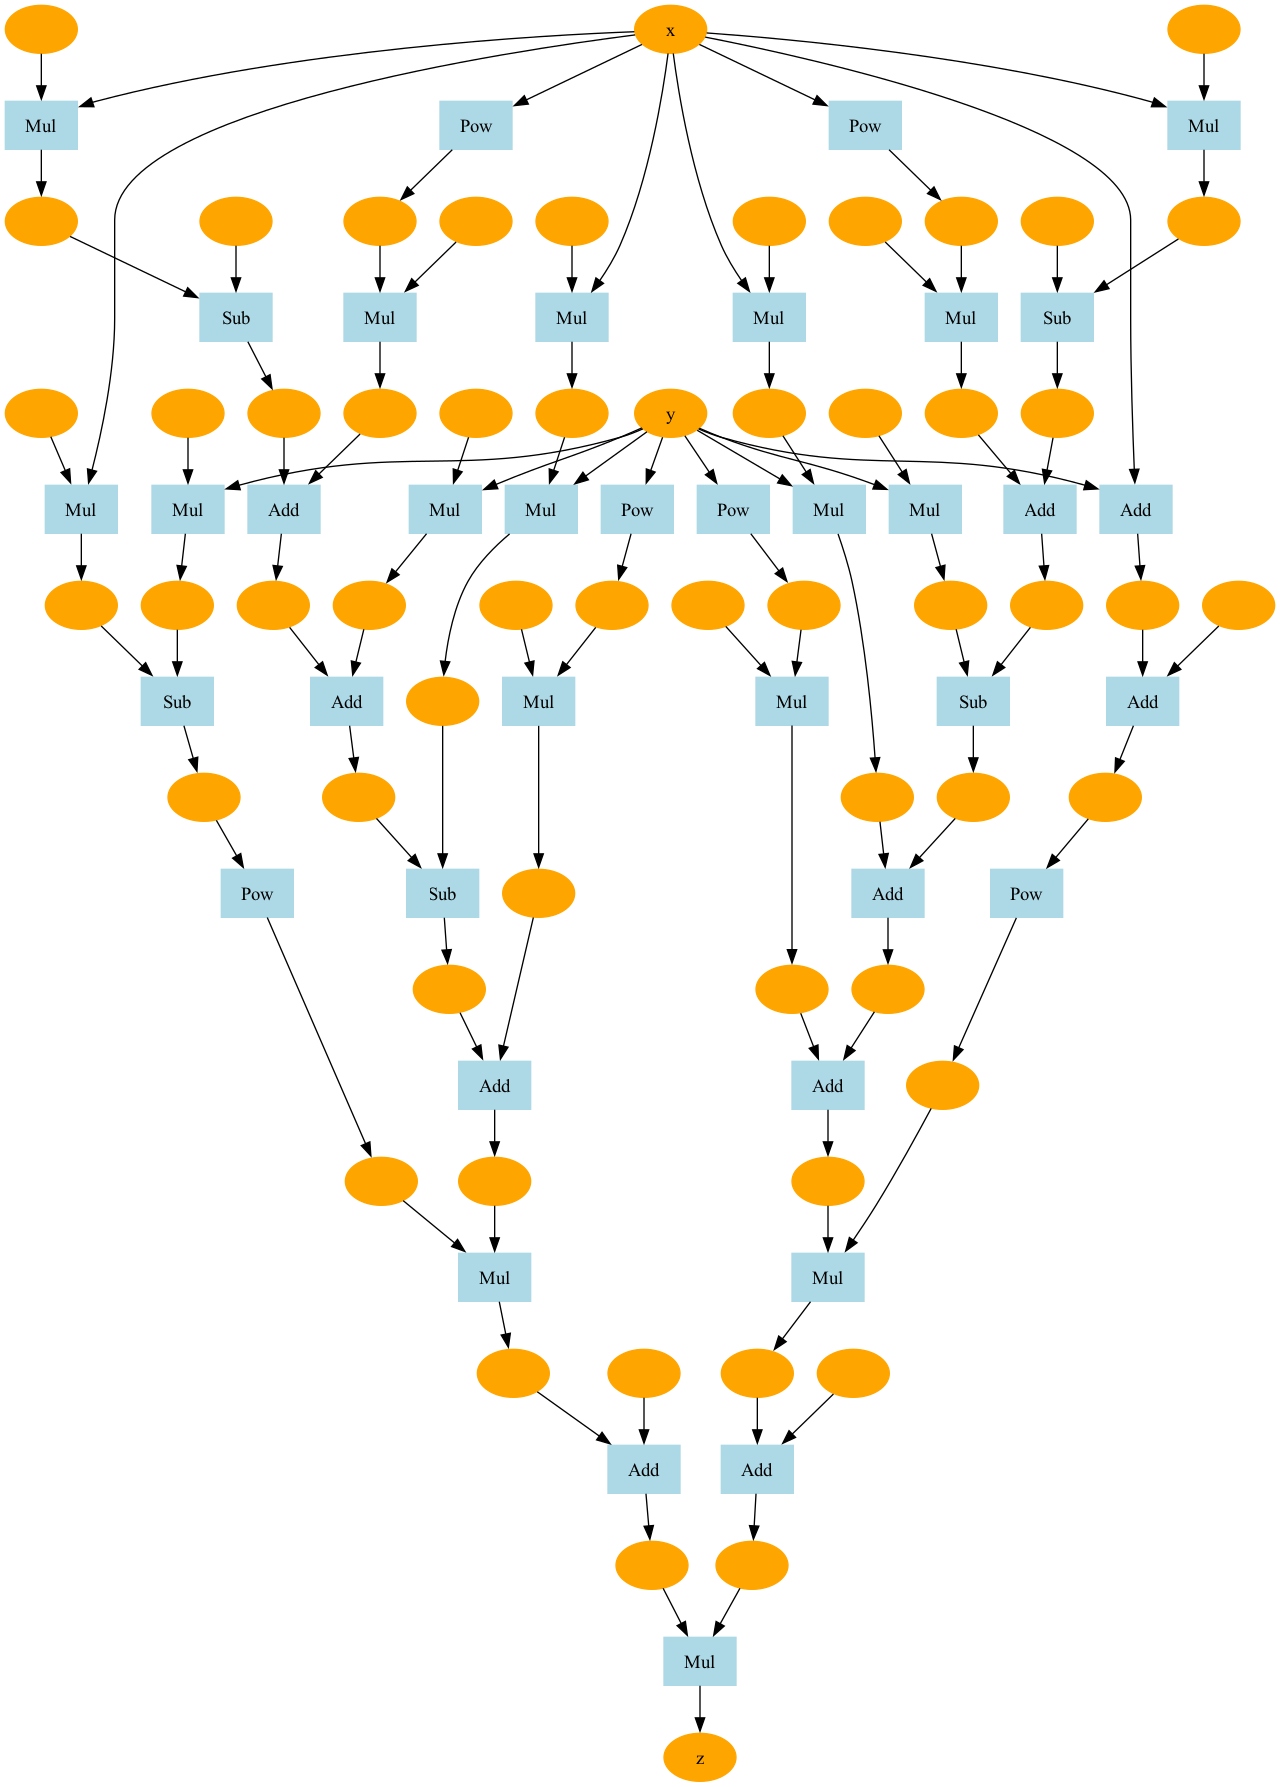

In [14]:
import numpy as np
from dezero import Variable
from dezero.utils import plot_dot_graph

def goldstein(x, y):
    z = (1 + (x + y + 1)**2 * (19-14*x+3*x**2-14*y+6*x*y+3*y**2)) * (30+(2*x-3*y)**2*(18-32*x+12*x**2+48*y-36*x*y+27*y**2))
    return z

x = Variable(np.array(1.0))
y = Variable(np.array(1.0))
z = goldstein(x,y)
z.backward()

x.name = 'x'
y.name = 'y'
z.name = 'z'
plot_dot_graph(z, verbose=False, to_file='goldstein.png')